In [2]:
import numpy as np
import pandas as pd
from typing import List


#### 1

#### 2

#### 3

#### 4

#### Dijksta's Algorithm

##### 743. Network Delay Time

In [ ]:
#You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges
#Each element in times is of the format [u, v, w], indicating that it takes w time for a signal to go from u to v.

#You are also given an integer k. We will send a signal from node k. 
#Return the minimum time it takes for every node to receive the signal. 
#If it's impossible for all nodes to receive the signal, return -1.



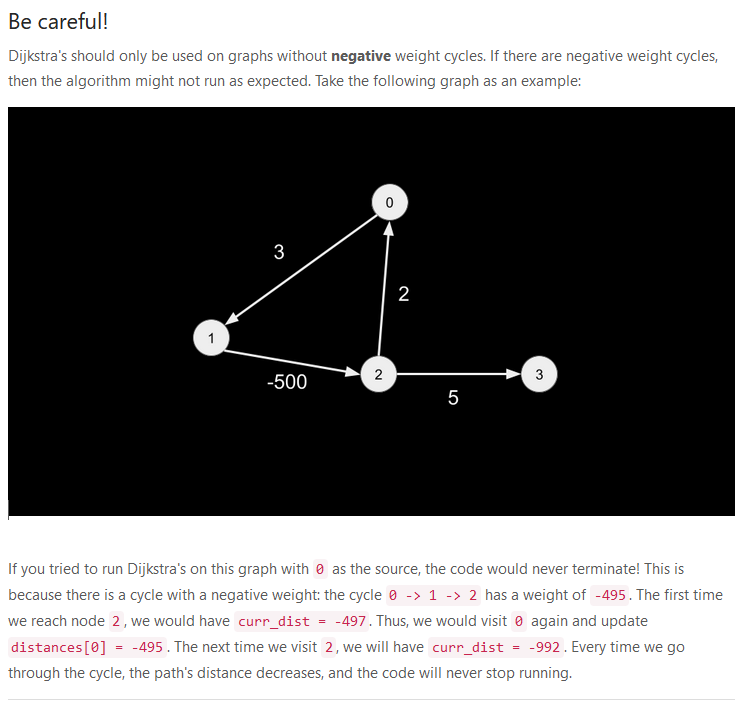

In [ ]:
from collections import defauldict
import heap
class Solution:
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        graph = defauldict(list)
        
        for x, y, z in times:
            graph[x-1].append([y-1, z])
        
        distances = [np.inf]*(n-1)
        distances[k-1] = 0
        heap = [(0, k-1)]
        
        while heap:
            curr_dist, node = heappop(heap)
            
            if curr_dist > distances[node]:
                continue
                
            for nei, weight in graph[node]:
                distance = curr_dist + weight
                
                if distance < distances[nei]:
                    heappush(heap, (distance, nei))
                    distances[nei] = distance
        
        ans = max(distances)
        return ans if ans < np.inf else -1
                
            
        
        
        
        

In [ ]:
class Solution:
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        graph = defaultdict(list)
        for x, y, z in times:
            graph[x - 1].append([y - 1, z])
        
        distances = [inf] * n
        distances[k - 1] = 0
        heap = [(0, k - 1)]
        while heap:
            curr_dist, node = heappop(heap)
            if curr_dist > distances[node]:
                continue
            
            for nei, weight in graph[node]:
                dist = curr_dist + weight
                if dist < distances[nei]:
                    distances[nei] = dist
                    heappush(heap, (dist, nei))

        ans = max(distances)
        return ans if ans < inf else -1

#### Bellman Ford Algorithm

In [ ]:
# https://www.youtube.com/watch?v=5eIK3zUdYmE

##### Cheapest Flights Within K Stops

In [3]:
from typing import List
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        
        prices = [float("inf")]*n
        prices[src] = 0
        
        for i in range(k+1):
            tmpPrices = prices.copy()
            
            for s, d, p in flights: #s = source, d = destination, p = price
                
                if prices[s]==float("inf"): #if price at the current src node is infinity
                    continue
                
                if prices[s]+ p < tmpPrices[d]:
                    tmpPrices[d] = prices[s] + p
            
            prices = tmpPrices
        
        return prices[dst] if prices[dst]<float("inf") else -1 
    

#### Intervals

##### 252 Meeting Rooms

Given an array of meeting times intervals where intervals[i] = [start, end] indicates the ithith meeting runs from [start, end), determine if one person could attend all meetings.

For example, given intervals = [[0, 30], [5, 10], [15, 20]], return false. If you attend the [0, 30] meeting, then you cannot attend the other two.

In [3]:
def canAttendMeetings(intervals):
    intervals.sort()
    for i in range(1, len(intervals)):
        if intervals[i][0] < intervals[i - 1][1]:
            return False
    
    return True

##### Merge Intervals

Given an array of intervals where intervals[i] = [start, end], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

For example, given intervals = [[1, 3], [2, 6], [8, 10], [15, 18]], return [[[1, 6], [8, 10], [15, 18]]]. The first two intervals merge to form [1, 6], and then the next two intervals have no overlap.

In [4]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        intervals.sort()
        ans = []
        
        for start, end in intervals:
            if ans and start <= ans[-1][1]:
                ans[-1][1] = max(ans[-1][1], end)
            else:
                ans.append([start, end])
        
        return ans

##### Insert Intervals

You are given an array of non-overlapping intervals intervals where intervals[i] = [starti, endi] represent the start and the end of the ith interval and intervals is sorted in ascending order by starti. You are also given an interval newInterval = [start, end] that represents the start and end of another interval.

Insert newInterval into intervals such that intervals is still sorted in ascending order by starti and intervals still does not have any overlapping intervals (merge overlapping intervals if necessary).

Return intervals after the insertion.

Note that you don't need to modify intervals in-place. You can make a new array and return it.

In [ ]:
# Input: intervals = [[1,3],[6,9]], newInterval = [2,5]
# Output: [[1,5],[6,9]]

In [5]:
# Input: intervals = [[1,2],[3,5],[6,7],[8,10],[12,16]], newInterval = [4,8]
# Output: [[1,2],[3,10],[12,16]]
# Explanation: Because the new interval [4,8] overlaps with [3,5],[6,7],[8,10]

In [8]:
from typing import List
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        intervals = intervals + [newInterval]
        intervals.sort()
        
        ans = []
        
        for start, end in intervals:
            if ans and start <= ans[-1][1]:
                ans[-1][1] = max(ans[-1][1], end)
            else:
                ans.append([start, end])
        return ans
        

#### Tries

A trie is a tree data structure, also known as a prefix tree. Usually, a trie stores characters of a string at each node. All paths from the root to a node represent a string of characters on the path (an idea we have seen extensively in this course). For example:

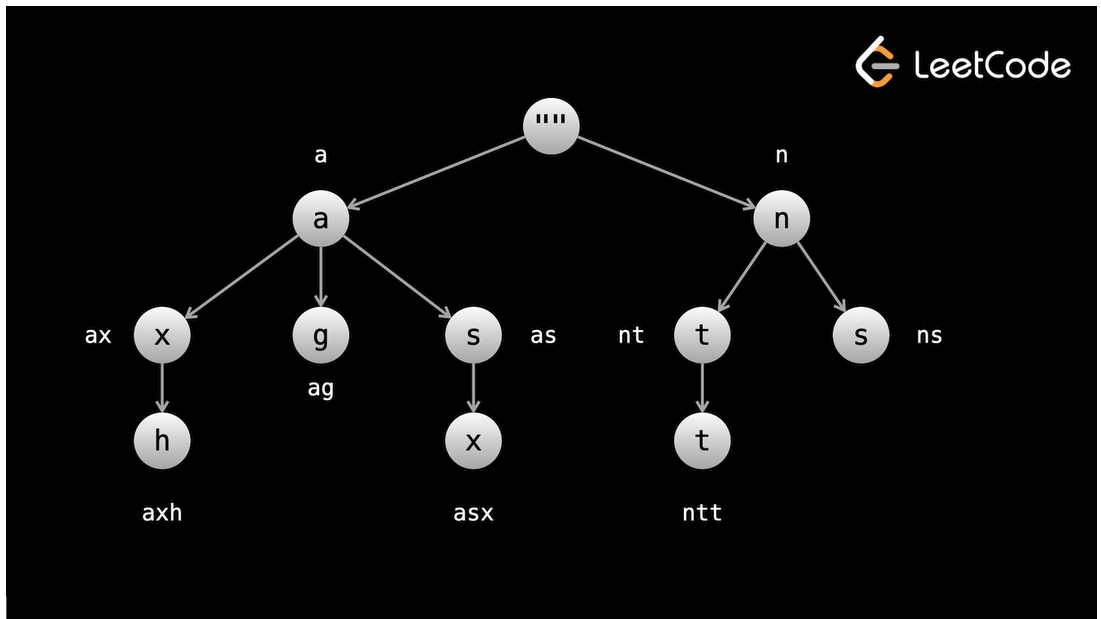

Tries can be used to efficiently implement string searching/matching algorithms. Let's say you have a huge list of words and a stream of characters (like someone typing). By building a trie, you can keep track of which words have the characters as a prefix. The following code can be used to build a trie (for an array of strings words):

In [8]:
# note: using a class is only necessary if you want to store data at each node.
# otherwise, you can implement a trie using only hash maps.
class TrieNode:
    def __init__(self):
        # you can store data at nodes if you wish
        self.data = None
        self.children = {}

def build_trie(words):
    root = TrieNode()
    for word in words:
        curr = root
        for c in word:
            if c not in curr.children:
                curr.children[c] = TrieNode()
            curr = curr.children[c]
        # at this point, you have a full word at curr
        # you can perform more logic here to give curr an attribute if you want
    
    return root

#### Modular Operations

##### 2233. Maximum Product After K Increments

You are given an array of non-negative integers nums and an integer k. In one operation, you may choose any element from nums and increment it by 1. Return the maximum product of nums after at most k operations, modulo 10^9+7

The optimal way to perform the increments is to greedily increment the smallest element at every operation. The mathematical explanation is as follows:

    You have x > y
    If you increment x, then (x + 1) * y = xy + y
    If you increment y, then x * (y + 1) = xy + x
    The second product is larger since x > y

We know how to continuously find the smallest element - with a heap. Convert nums into a min heap, pop from it, add 1 to the result, then push it back. Do this k times, and at the end, multiply all the numbers together and return the answer.

In [3]:
class Solution:
    def maximumProduct(self, nums: List[int], k: int) -> int:
        heapq.heapify(nums)
            
        for _ in range(k):
            heapq.heappush(nums, heapq.heappop(nums) + 1)
        
        MOD = 1_000_000_007
        ans = 1
        for x in nums:
            ans *= x
        
        return ans % MOD

In [4]:
######## Better Solution

In [5]:
class Solution:
    def maximumProduct(self, nums: List[int], k: int) -> int:
        heapq.heapify(nums)
            
        for _ in range(k):
            heapq.heappush(nums, heapq.heappop(nums) + 1)
        
        MOD = 1_000_000_007
        ans = 1
        for x in nums:
            ans = (ans * x) % MOD
        
        return ans

##### 2575 Find the divisibility array of a string

You are given a 0-indexed string word of length n consisting of digits, and a positive integer m.

Return an array div of length n. For each index i, if the numeric value of word[0, ..., i] is divisible by m, then div[i] = 1. Otherwise, div[i] = 0.

In [6]:
# Example 1:

# Input: word = "998244353", m = 3
# Output: [1,1,0,0,0,1,1,0,0]
# Explanation: There are only 4 prefixes that are divisible by 3: "9", "99", "998244", and "9982443".

# Example 2:

# Input: word = "1010", m = 10
# Output: [0,1,0,1]
# Explanation: There are only 2 prefixes that are divisible by 10: "10", and "1010".


The simplest way to solve this problem would be to just iterate over word and at each index i, convert the prefix string into an integer, then check if that integer is divisible by m using the modulo operator.

However, the constraints give n<=105. This is problematic as converting a string to an integer costs O(n), where n is the length of the string. This means that in string operations alone, we will spend 1+2+3+...+n, which as we know is O(n2) operations.

A workaround is to start with an integer curr = 0, and then "append" digits one by one. When we "append" a digit, the magnitude increases by one, then the last digit becomes the appended digit. This translates to the formula curr = curr * 10 + digit. Now, we only need to convert strings of length 1.

This is still insufficient. Because each digit increases the magnitude of the number, the final integer could be on the order of 10^10^5. This is absurdly large, and performing any operations on a number of this size will be very slow. You probably can't even store it in memory (long long in C++ can't even store 10^19, and we are talking about 10^100,000).

This is where modular arithmetic comes in. Because we are only concerned if each prefix is divisible by m, we can perform all operations mod m. Instead of curr = curr * 10 + digit, we can do curr = (curr * 10 + digit) % m. As we learned above, this will not change the answer.

In [ ]:
class Solution:
    def divisibilityArray(self, word: str, m: int) -> List[int]:
        div = []
        curr = 0
        
        for digit in word:
            curr = (curr * 10 + int(digit)) % m
            if curr == 0:
                div.append(1)
            else:
                div.append(0)
        
        return div